# <center> <font color=blue> Customer Churn Prediction in Telecom industry </font> </center>

By: Gogineni Venkata Sritha <br>
    Shwetanjali Dora<br>
    Karishma Saikia<br>

    

## Introduction:

Churn is defined as non completion of a business critical event by the customer with in a specified interval of time. Depending on the nature of business, churn can be classified as one of the below actions

- who purchased before and hasn't completed at least one purchase within a specified interval
- when customer hasn't used the product within a specified interval
- who canceled subscription of service which they were continuously paying previously

Customers churn either voluntarily or involuntarily. Involuntary churn happens when the customer choses not to continue using the product for factors beyond the company's control like relocation, death. Voluntary churn is defined as when customer chooses to switch to a different product because of various factors. **Companies are interested in knowing this segment of customers so that they can take corrective actions and direct their marketing, customer relation teams to reduce this voluntary churn**

In this fast moving digital world, retaining a customer is much cheaper than trying to win back a churn customer. Hence data science methods to identify and predict the cluster of customers who have a higher probability to churn is a very valuable resource that companies engage to take the right business decisions.
    

## Problem Statement:

In this analysis, we will be using a sample data set shared by IBM on Telecom customer data to analyze and predict the customers who are most likely to churn. Churn is defined as the customer who left within the last six months. 

By analyzing the customer behavior to predict churn, the Telecom company can develop customer retention programs to retain these customers, thus preventing churn.

## About the Data set: 

Data set has been downloaded from 

- https://www.kaggle.com/blastchar/telco-customer-churn

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Importing all the necessary libraries

In [3]:
import numpy as np 
import pandas as pd

# For data manipulations using SQL format
from pandasql import *

# For visualization
import seaborn as sns
import ipython_genutils
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from textwrap import wrap 

# For Statistical Analysis
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.model_selection import ( KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)

from sklearn.ensemble import (RandomForestClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from time import time

#For Deep Learning
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense


import warnings
warnings.filterwarnings('ignore')



## Data overview

- Imported the dataset into a pandas data frame
- This raw data set has 7043 rows and 21 columns

In [4]:
cust_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
cust_data.shape

(7043, 21)

In [5]:
# Printing out the top 5 rows to have a quick sneak peak into the imported dataset
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data cleaning and Manipulations

Before building a model, we need to use a clean data set with no missing values or incompatible column types. In this step,
- Checked rows with missing values
- Checked duplicate rows
- Identified and converted the column data types to their right data type which represents the nature of the metric

In [6]:
cust_data = cust_data.dropna(how="all")  # remove samples with all missing values

In [7]:
cust_data = cust_data[~cust_data.duplicated()] # remove duplicates
cust_data.shape

(7043, 21)

There were no duplicate values and NULL values as the shape remains same.

Removing the missing rows where the total charges are not available. The count of such rows is 11

In [8]:
total_charges_filter = cust_data.TotalCharges == " " 
cust_data = cust_data[~total_charges_filter]
cust_data.shape

(7032, 21)

In [9]:
cust_data['Churn'].value_counts(sort = True)

No     5163
Yes    1869
Name: Churn, dtype: int64

In [10]:
cust_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total Charges should be numeric as it is in dollars

In [11]:
cust_data.TotalCharges = pd.to_numeric(cust_data.TotalCharges)

In [12]:
cust_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Identifying the unique values for each column Type

Identifying the unique values for each column type helps us to form the exploratory data analysis. While *df.describe()* gives the distribution of numeric values, getting the distinct column values for non numeric columns helps in constructing the relation between that column and our predictor variable - *Churn* 

In [13]:
for item in cust_data.columns:
    print(item)
    print (cust_data[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

#### Some of the columns are categorical which has Yes or No.
We need to convert them to 1's and 0's to for building a regression model

In [14]:
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    cust_data[item].replace(to_replace='Yes', value=1, inplace=True)
    cust_data[item].replace(to_replace='No',  value=0, inplace=True)

cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [15]:
cust_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## Exploratory data Analysis

#### Exploratory data analysis (EDA) is an approach to analyze data sets to summarize their main characteristics, often with visual methods.

#### Gender Distribution in Total dataset: 

The data set has almost equal proportions of Male and female customers

,gender,cnt
0,Female,3483
1,Male,3549


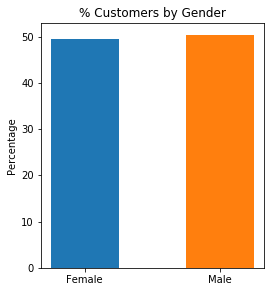

In [16]:
gender = """
    select gender, count(*) as cnt from cust_data group by gender
"""

gender_df = sqldf(gender, locals())


objects = gender_df["gender"]
y_pos = np.arange(len(objects))
performance = gender_df["cnt"]*100/(3488+3555)
color = ['C0', 'C1']
 
plt.figure(figsize=(4,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.5, color = color)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('% Customers by Gender')
    
while True:
    display(gender_df)
    break 
    
plt.show()

#### Senior Citizen distribution in Total dataset: 
- Non senior citizens form the majority
- ~84% of the overall customers are non senior citizens

,SeniorCitizen,cnt
0,0,5890
1,1,1142


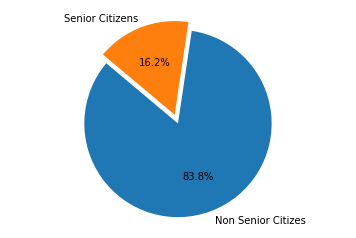

In [17]:
SC = """
    select SeniorCitizen, count(*) as cnt from cust_data group by SeniorCitizen
"""

SC_df = sqldf(SC, locals())

labels = ['Non Senior Citizes','Senior Citizens']
sizes = SC_df['cnt']
colors = ['C0','C1']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140)

while True:
    display(SC_df)
    break
 
plt.axis('equal')
plt.show()

### Count of Customers by Tenure
- 1 month and 72 months are the top segments by tenure

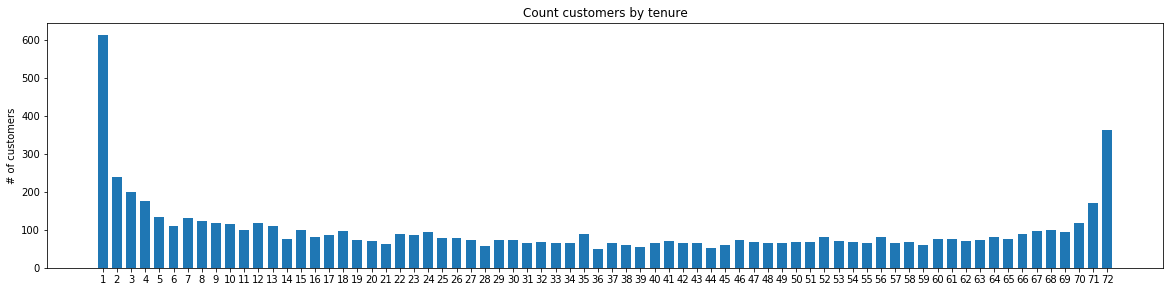

In [18]:
Active_time = """
    select tenure, count(*) as cnt from cust_data group by tenure
"""

AT_df = sqldf(Active_time, locals())

objects = AT_df["tenure"]
y_pos = np.arange(len(objects))
performance = AT_df["cnt"]
#color = ['C0', 'C1']
 
plt.figure(figsize=(20,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('# of customers')
plt.title('Count customers by tenure')
    
plt.show()

### Customers by Contract Type
- 50% of the customers have contracts monthly basis

,Contract,cnt
0,Month-to-month,3875
1,One year,1472
2,Two year,1685


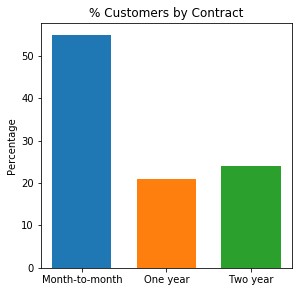

In [19]:
Contract_type = """
    select contract, count(*) as cnt from cust_data group by contract
"""

CT_df = sqldf(Contract_type, locals())

objects = CT_df["Contract"]
y_pos = np.arange(len(objects))
performance = CT_df["cnt"]*100/(3875+1473+1695)
color = ['C0', 'C1', 'C2']
 
plt.figure(figsize=(4.5,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.7, color = color)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('% Customers by Contract')
    
while True:
    display(CT_df)
    break
    
plt.show()

In [20]:
Contract_type_Tenure = """
    select contract, tenure , count(*) as cnt from cust_data group by contract, tenure
"""

CTT_df = sqldf(Contract_type_Tenure, locals())

print(CTT_df.head())

         Contract  tenure  cnt
0  Month-to-month       1  604
1  Month-to-month       2  230
2  Month-to-month       3  191
3  Month-to-month       4  165
4  Month-to-month       5  128


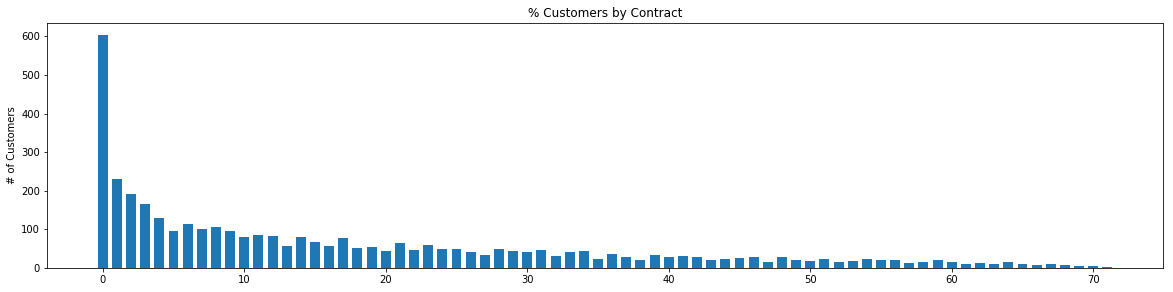

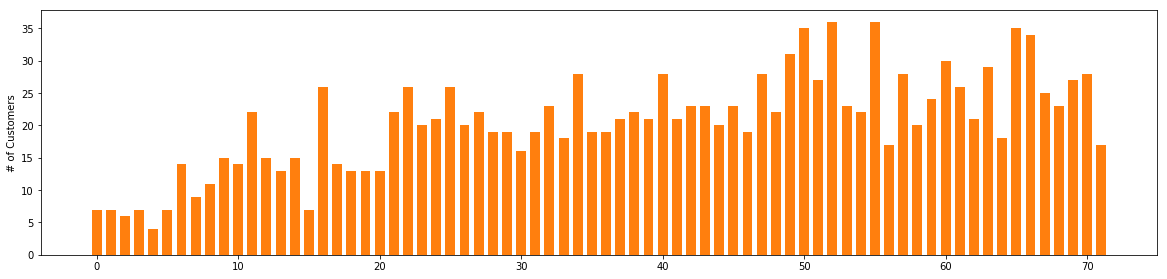

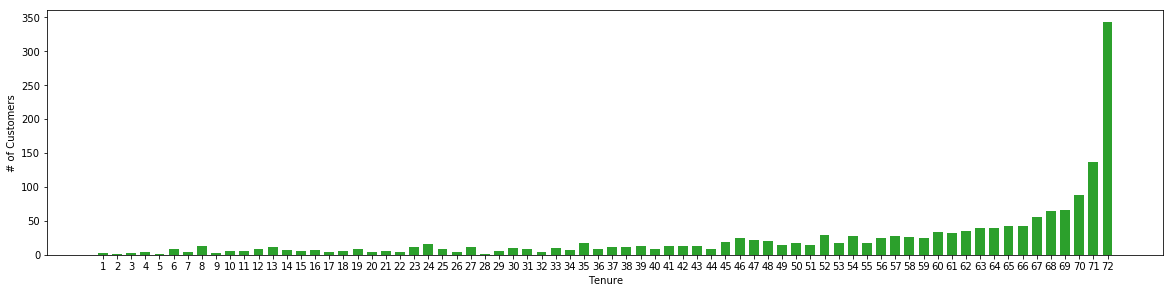

In [21]:
objects = CTT_df[CTT_df['Contract'] == 'Month-to-month']['tenure']
y_pos = np.arange(len(objects))
performance = CTT_df[CTT_df['Contract'] == 'Month-to-month']["cnt"]
color = ['C0']
 
plt.figure(figsize=(20,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.7, color = color)
#plt.xticks(y_pos, objects)
plt.ylabel('# of Customers')
plt.title('% Customers by Contract')
plt.show()

objects = CTT_df[CTT_df['Contract'] == 'One year']['tenure']
y_pos = np.arange(len(objects))
performance = CTT_df[CTT_df['Contract'] == 'One year']["cnt"]
color = ['C1']

plt.figure(figsize=(20,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.7, color = color)
#plt.xticks(y_pos, objects)
plt.ylabel('# of Customers')
#plt.title('% Customers by Contract')
plt.show()

objects = CTT_df[CTT_df['Contract'] == 'Two year']['tenure']
y_pos = np.arange(len(objects))
performance = CTT_df[CTT_df['Contract'] == 'Two year']["cnt"]
color = ['C2']

plt.figure(figsize=(20,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.7, color = color)
plt.xticks(y_pos, objects)
plt.ylabel('# of Customers')
plt.xlabel('Tenure')
#plt.title('% Customers by Contract')
plt.show()

## Churn distribution

- We have 30% of the customers as churned users in this data set

,Churn,cnt
0,0,5163
1,1,1869


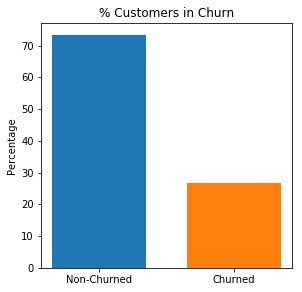

In [22]:
churn = """
    select churn, count(*) as cnt from cust_data group by churn
"""

C_df = sqldf(churn, locals())

objects = ['Non-Churned', 'Churned']
y_pos = np.arange(len(objects))
performance = C_df["cnt"]*100/(5163+1869)
color = ['C0', 'C1']
 
plt.figure(figsize=(4.5,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.7, color = color)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('% Customers in Churn')

while True:
    display(C_df)
    break
    
plt.show()

### Churned customers by Gender

- Customer churn is almost similar in Male and Female segments
- 30% of the customers are found to be churning in both the genders
- We can say that the gender does not impact churn

,gender,Churn,cnt
0,Female,0,2544
1,Female,1,939
2,Male,0,2619
3,Male,1,930


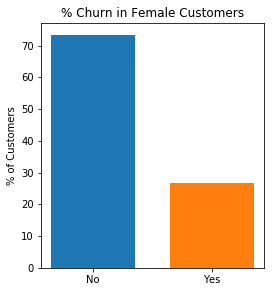

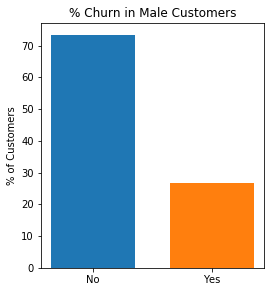

In [23]:
gender_churn = """
    select gender, churn, count(*) as cnt from cust_data group by gender, churn
"""

GC_df = sqldf(gender_churn, locals())

while True:
    display(GC_df)
    break
    
objects = ['No', 'Yes']
y_pos = np.arange(len(objects))
performance1 = GC_df[GC_df['gender'] == 'Female']["cnt"]*100/(2549+939)
color = ['C0','C1']
 
  
plt.figure(figsize=(4,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.7, color = color)
plt.xticks(y_pos, objects)
plt.ylabel('% of Customers')
plt.title('% Churn in Female Customers')
plt.show()
 
objects = ['No', 'Yes'] #GC_df[GC_df['gender'] == 'Male']['Churn']
y_pos = np.arange(len(objects))
performance2 = GC_df[GC_df['gender'] == 'Male']["cnt"]*100/(2625+930)
color = ['C0','C1']
 
plt.figure(figsize=(4,4.5))
plt.bar(y_pos, performance, align='center', alpha=1, width=0.7, color = color)
plt.xticks(y_pos, objects)
plt.ylabel('% of Customers')
plt.title('% Churn in Male Customers')
plt.show()

### Churned customers by Senior citizen flag: 

More senior citizens churn out than non senior citizens

- 23% of the customers in non senior citizen segment churn out
- Where as 41% of senior citizens churn out

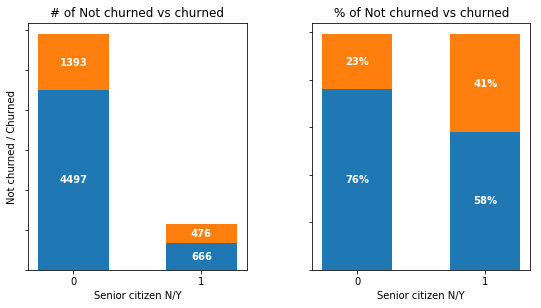

In [24]:


snr_ctzn_churn = """
    select
        SeniorCitizen,
        not_churned,
        churned,
        (not_churned*100/total_users) as not_churn_pctg,
        (churned*100/total_users) as churn_pctg
    from
    (
    select 
        SeniorCitizen, 
        sum(case when churn=0 then 1 else 0 end) as not_churned,
        sum(case when churn=1 then 1 else 0 end) as churned,
        sum(1) as total_users
    from cust_data 
    group by SeniorCitizen
    ) x   
"""

snr_ctzn_churn_df = sqldf(snr_ctzn_churn, locals())

#print(snr_ctzn_churn_df)

senior_ctz = snr_ctzn_churn_df.iloc[:,0]
not_churned = snr_ctzn_churn_df.iloc[:,1]
churned = snr_ctzn_churn_df.iloc[:,2]

indx = np.arange(len(snr_ctzn_churn_df))
plt.figure(figsize=(9,10))
plt.subplot(2,2,1)

graphNotChurned = plt.bar(x=indx, height=not_churned, width = 0.55)
graphChurned = plt.bar(x=indx, height=churned, width = 0.55, bottom=not_churned)

plt.xlabel('Senior citizen N/Y')
plt.ylabel('Not churned / Churned')


plt.xticks(indx,senior_ctz)
plt.title('# of Not churned vs churned')

for r1, r2 in zip(graphNotChurned, graphChurned):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=10, fontweight="bold")

# hiding the y-axis labels
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])



############# Sub plot for percentage graphs #############

senior_ctz = snr_ctzn_churn_df.iloc[:,0]
not_churned_pct = snr_ctzn_churn_df.iloc[:,3]
churned_pct = snr_ctzn_churn_df.iloc[:,4]

indx_pct = np.arange(len(snr_ctzn_churn_df))
plt.subplot(2,2,2)

graphNotChurned_pct = plt.bar(x=indx_pct, height=not_churned_pct, width = 0.55)
graphChurned_pct = plt.bar(x=indx_pct, height=churned_pct, width = 0.55, bottom=not_churned_pct)

plt.xlabel('Senior citizen N/Y')
#plt.ylabel('Not churned / Churned')


plt.xticks(indx,senior_ctz)
plt.title('% of Not churned vs churned')

for r1, r2 in zip(graphNotChurned_pct, graphChurned_pct):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1+"%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2+"%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")

# hiding the y-axis labels
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

In [25]:
Tenure_churn = """
    select
        Tenure,
        not_churned,
        churned,
        (not_churned*100/total_users) as not_churn_pctg,
        (churned*100/total_users) as churn_pctg
    from
    (
        select 
            Tenure, 
            sum(case when churn=0 then 1 else 0 end) as not_churned,
            sum(case when churn=1 then 1 else 0 end) as churned,
            sum(1) as total_users
        from cust_data 
        group by Tenure
    ) x   
"""

Tenure_churn_df = sqldf(Tenure_churn, locals())

print(Tenure_churn_df.head())


   Tenure  not_churned  churned  not_churn_pctg  churn_pctg
0       1          233      380              38          61
1       2          115      123              48          51
2       3          106       94              53          47
3       4           93       83              52          47
4       5           69       64              51          48


### Churn by Tenure 

As the tenure of the customers increases with company, the percentage of customers churning out has been reducing significantly  

Initially with one or two months the percentage of churning out is as high as 45% but as the number of months increases, the churn came down to as low as 3-4 %

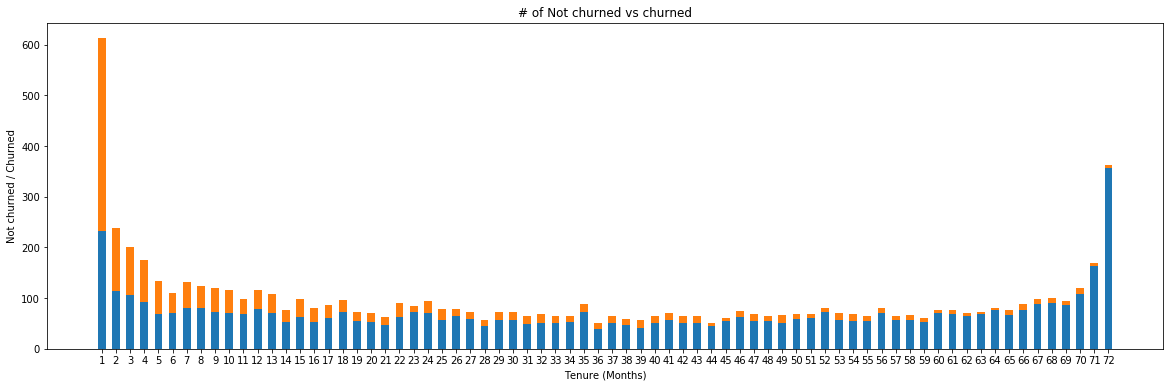

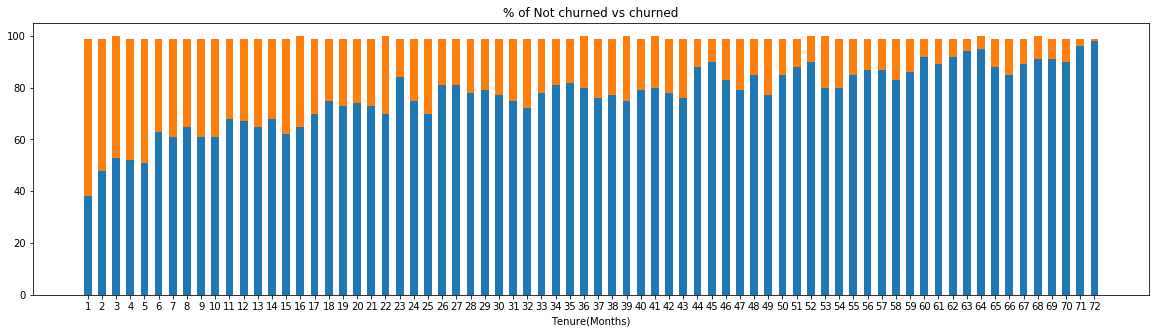

In [26]:
Tenure = Tenure_churn_df.iloc[:,0]
not_churned = Tenure_churn_df.iloc[:,1]
churned = Tenure_churn_df.iloc[:,2]

indx = np.arange(len(Tenure_churn_df))
plt.figure(figsize=(20,6))
#plt.subplot(2,2,1)

graphNotChurned = plt.bar(x=indx, height=not_churned, width = 0.55)
graphChurned = plt.bar(x=indx, height=churned, width = 0.55, bottom=not_churned)

plt.xlabel('Tenure (Months)')
plt.ylabel('Not churned / Churned')


plt.xticks(indx,Tenure)
plt.title('# of Not churned vs churned')

for r1, r2 in zip(graphNotChurned, graphChurned):
    h1 = r1.get_height()
    h2 = r2.get_height()
   # plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
   # plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=10, fontweight="bold")

# hiding the y-axis labels
#frame1 = plt.gca()
#frame1.axes.yaxis.set_ticklabels([])


############# Sub plot for percentage graphs #############

Tenure = Tenure_churn_df.iloc[:,0]
not_churned_pct = Tenure_churn_df.iloc[:,3]
churned_pct = Tenure_churn_df.iloc[:,4]

indx_pct = np.arange(len(Tenure_churn_df))
plt.figure(figsize=(20,5))
#plt.subplot(2,2,2)

graphNotChurned_pct = plt.bar(x=indx_pct, height=not_churned_pct, width = 0.55)
graphChurned_pct = plt.bar(x=indx_pct, height=churned_pct, width = 0.55, bottom=not_churned_pct)

plt.xlabel('Tenure(Months)')
#plt.ylabel('Not churned / Churned')


plt.xticks(indx,Tenure)
plt.title('% of Not churned vs churned')

for r1, r2 in zip(graphNotChurned_pct, graphChurned_pct):
    h1 = r1.get_height()
    h2 = r2.get_height()
   # plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1+"%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")
   # plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2+"%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")



### Churn by Contract Type

- 42% of the customers churn out who has monthly contracts
- 11% of the customers who churn out, have yearly contracts
- Only 2% customer churn was seen with 2 year contract

Higher the contract term, lower is the churn rate


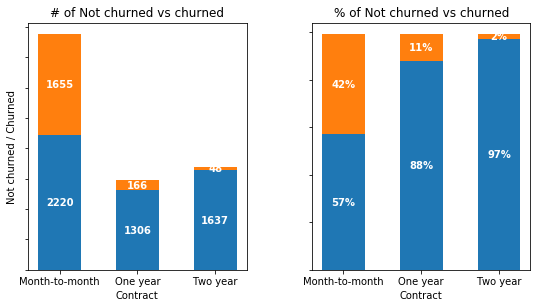

In [27]:
Contract_churn = """
    select
        Contract,
        not_churned,
        churned,
        (not_churned*100/total_users) as not_churn_pctg,
        (churned*100/total_users) as churn_pctg
    from
    (
    select 
        Contract, 
        sum(case when churn=0 then 1 else 0 end) as not_churned,
        sum(case when churn=1 then 1 else 0 end) as churned,
        sum(1) as total_users
    from cust_data 
    group by Contract
    ) x   
"""

Contract_churn_df = sqldf(Contract_churn, locals())

#print(Contract_churn_df)

contract = Contract_churn_df.iloc[:,0]
not_churned = Contract_churn_df.iloc[:,1]
churned = Contract_churn_df.iloc[:,2]

indx = np.arange(len(Contract_churn_df))
plt.figure(figsize=(9,10))
plt.subplot(2,2,1)

graphNotChurned = plt.bar(x=indx, height=not_churned, width = 0.55)
graphChurned = plt.bar(x=indx, height=churned, width = 0.55, bottom=not_churned)

plt.xlabel('Contract')
plt.ylabel('Not churned / Churned')


plt.xticks(indx,contract)
plt.title('# of Not churned vs churned')

for r1, r2 in zip(graphNotChurned, graphChurned):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=10, fontweight="bold")

# hiding the y-axis labels
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])



############# Sub plot for percentage graphs #############

contract = Contract_churn_df.iloc[:,0]
not_churned_pct = Contract_churn_df.iloc[:,3]
churned_pct = Contract_churn_df.iloc[:,4]

indx_pct = np.arange(len(Contract_churn_df))
plt.subplot(2,2,2)

graphNotChurned_pct = plt.bar(x=indx_pct, height=not_churned_pct, width = 0.55)
graphChurned_pct = plt.bar(x=indx_pct, height=churned_pct, width = 0.55, bottom=not_churned_pct)

plt.xlabel('Contract')
#plt.ylabel('Not churned / Churned')


plt.xticks(indx,contract)
plt.title('% of Not churned vs churned')

for r1, r2 in zip(graphNotChurned_pct, graphChurned_pct):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1+"%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2+"%", ha="center", va="center", color="white", fontsize=10, fontweight="bold")

# hiding the y-axis labels
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

###  Monthly Charges vs Total Charges 

This scatter plot gives us the relation between monthly charges and total charges

It can be seen that, it is positively correlated. As there will be no case of monthly charges > total charges and if one increases other would increase

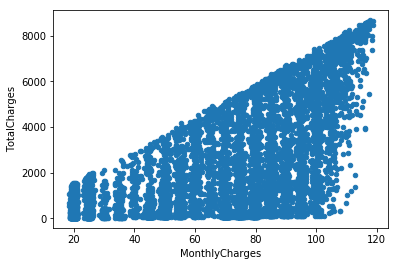

In [28]:
cust_data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

###  Monthly Charges vs Churn

We can clearly define that they are positively correlated 
 - As the churn is very high as the monthly amount increases.

 - The churn is lower when the monthly bill amount is lower

Text(0.5,1,'Distribution of monthly charges by churn')

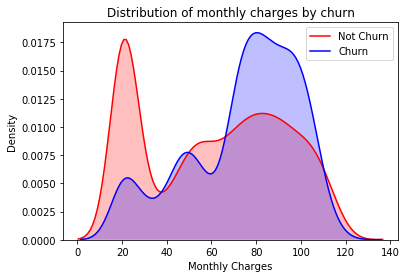

In [29]:
ax = sns.kdeplot(cust_data.MonthlyCharges[(cust_data["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(cust_data.MonthlyCharges[(cust_data["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### Higher the Total charges - lower is the churn rate

This could be the case of causation rather than correlation. Users who pay more to the company have lower propensity to churn out

Text(0.5,1,'Distribution of total charges by churn')

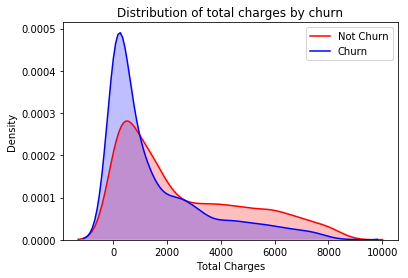

In [30]:
ax = sns.kdeplot(cust_data.TotalCharges[(cust_data["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(cust_data.TotalCharges[(cust_data["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

## Correlation 

- Correlation is usually defined as a measure of the linear relationship between two quantitative variables (e.g., height and weight). Often a slightly looser definition is used, whereby correlation simply means that there is some type of relationship between two variables.
- Correlation values could be positive or negative ranging between [-1, +1], where +1 is highly correlated and -1 is least correlated.

## Correlation Matrix  

- A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.
- As the gradient of the box is lighter, higher is the correlation
- Tenure and Total charges are highly correlated. This can be explained by customers with higher tenure paying more charges

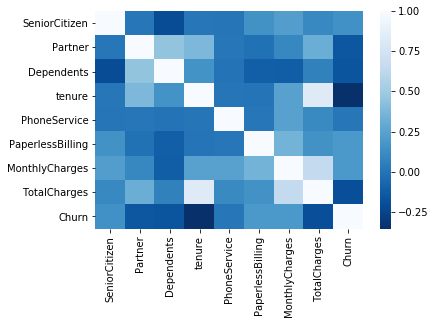

In [31]:
# calculate the correlation matrix
corr = cust_data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap = 'Blues_r')

### Manipulating data for application of logistic regression

Removing the customer id

In [32]:
df2 = cust_data

try:
    customer_id = df2['customerID'] # Store this as customer_id variable
    del df2['customerID'] # Don't need in ML DF
except:
    print("already removed customerID")

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## Creating Dummy Variables 

Dummies to convert the categorical variable to binary values 

Since gender is a categorical variable with only two unique values, we can convert it into binary representing Female and Male respectively

As Logistic regression runs on the categorical variables, we need to convert the dependent variables into categorical variables using dummies function in python 

In [33]:
df=cust_data.copy()

In [34]:
cust_data['gender'].replace(to_replace='Female', value=0, inplace=True)
cust_data['gender'].replace(to_replace='Male',  value=1, inplace=True)

cust_data_dummies = pd.get_dummies(df2)
cust_data_dummies.fillna(value=0, inplace=True)
cust_data_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### Columns in Dummies Table after converting into 2 variable categorical columns

In [35]:
print(cust_data_dummies.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

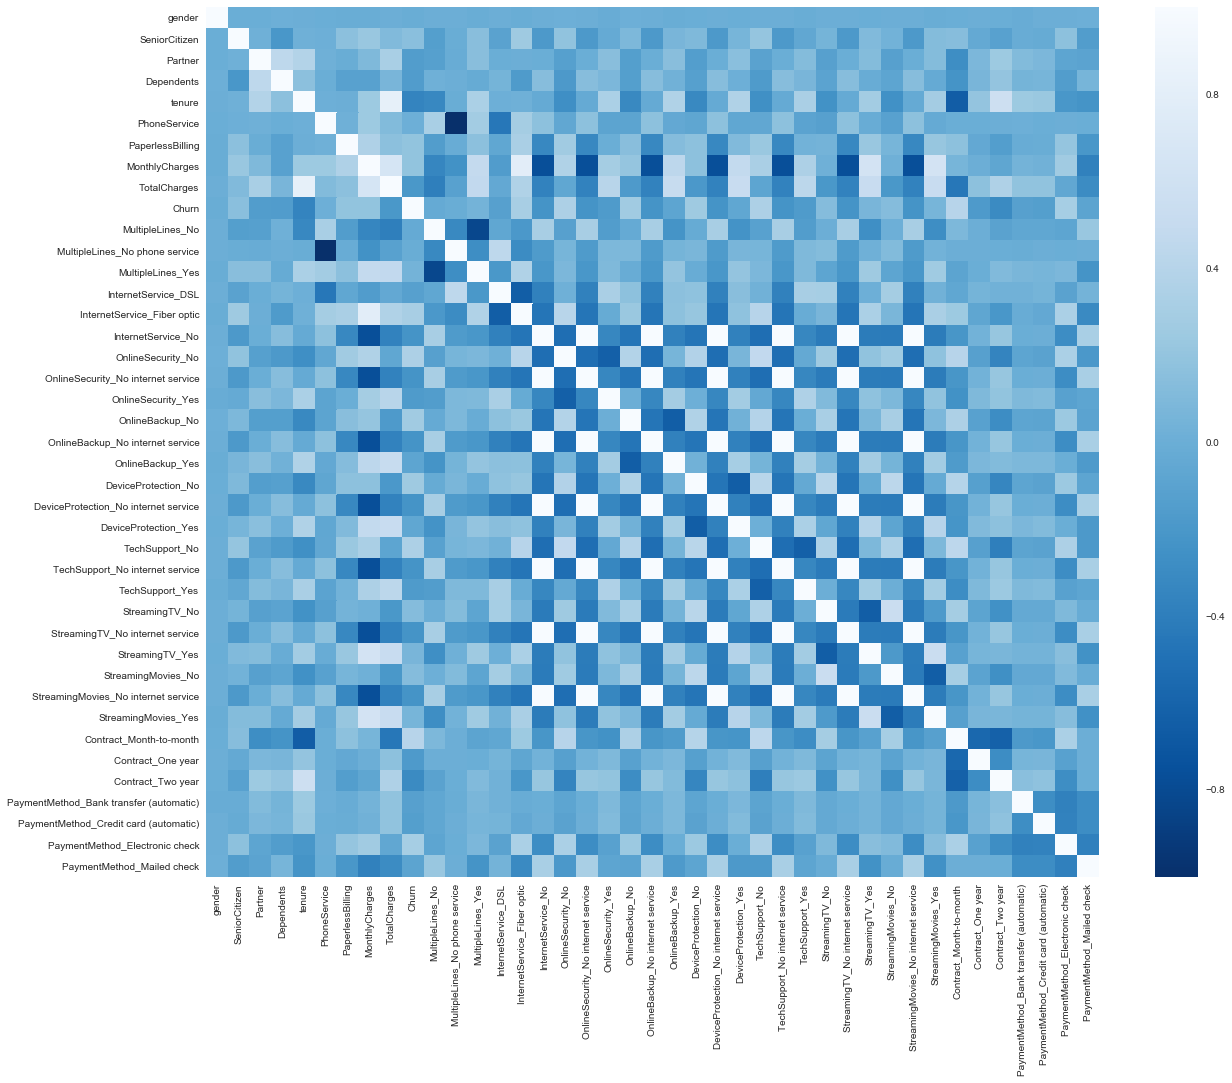

In [36]:
# calculate the correlation matrix
corr = cust_data_dummies.corr()

# plot the heatmap
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap = 'Blues_r')

## Churn correlation with all other variables in data

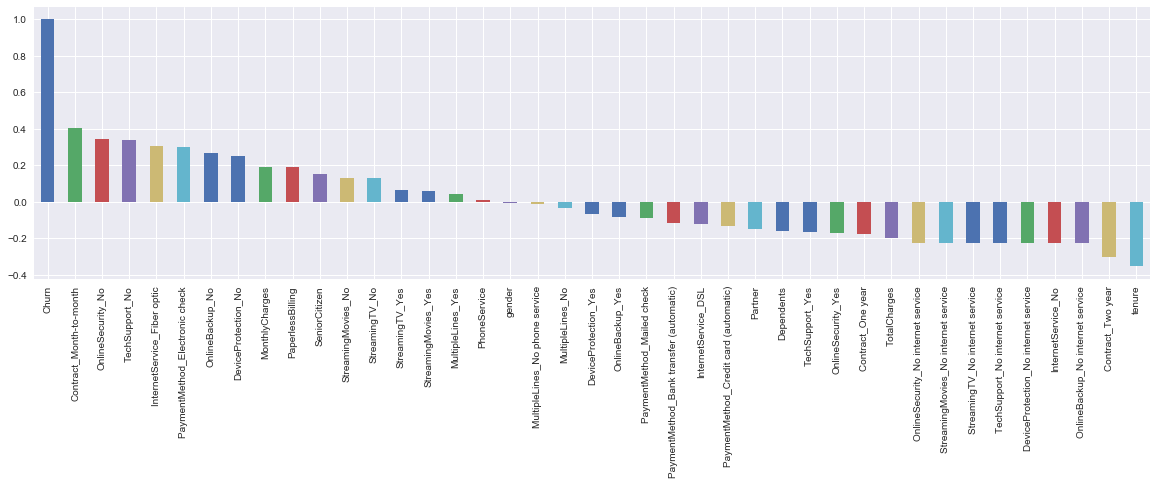

In [37]:
plt.figure(figsize=(20,5))
cust_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.figure(figsize=(5,5))

## MACHINE LEARNING

We decided to perform our analysis on four classifier models mentioned below and also try with neural networks.

- Logistic Regression 
- Naive Bayes
- KNN
- Random Forest
- Deep Learning*

Before moving ahead with in depth analysis, we wanted to get an overview of the performance of all the models.

KNN: 77.468342 (+/- 1.647183) performed in 3.629299 seconds
RF: 79.419318 (+/- 1.145221) performed in 10.111009 seconds
LR: 80.618135 (+/- 1.001472) performed in 0.300394 seconds
NB: 75.315517 (+/- 1.710023) performed in 0.088759 seconds


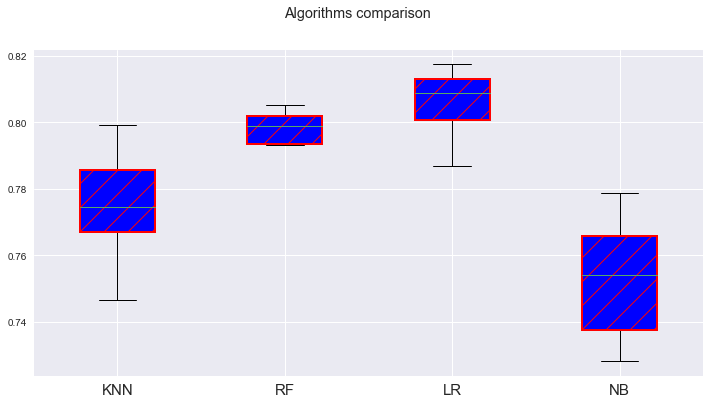

In [38]:
#Used label encoder so that all the models with ease
#df is a copied dataframe of original dataframe with some initial manipulation
lb = LabelEncoder() 
column_name=df.columns

for y in column_name:
    df[y]=lb.fit_transform(df[y] ) 

X = df.loc[:, df.columns != 'Churn']
y = df.loc[:, df.columns == 'Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pipelines = []
n_estimators = 500

n_neighbors=11

pipelines.append(('KNN',
                  Pipeline([ 
                              ('sc', StandardScaler()),
                            ('KNN', KNeighborsClassifier(n_neighbors=n_neighbors)) ])))

pipelines.append( ('RF',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('RF', RandomForestClassifier(random_state=0, n_estimators=n_estimators)) ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('LR', LogisticRegression(random_state=0)) ]) ))

pipelines.append( ('NB',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('NB', GaussianNB()) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)
    
    
fig = plt.figure(figsize=(12,6))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
bp0=plt.boxplot(results, patch_artist=True)
ax.set_xticklabels(names, size=15)


for box in bp0['boxes']:
    box.set(color='red', linewidth=2)
    box.set(facecolor = 'blue' )
    box.set(hatch = '/')
plt.show()

We got an initial idea that Random Forest and Logistic regression performed the best among all the models. Let us now move ahead with in depth analysis

### FEATURE ENGINEERING & DATA MANIPULATION

Encoding the columns

In [39]:
X = cust_data_dummies.loc[:, cust_data_dummies.columns != 'Churn']
y = cust_data_dummies.loc[:, cust_data_dummies.columns == 'Churn']

### Over-sampling using SMOTE
With our training data created, we up-sampled the churn using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

- Works by creating synthetic samples from the minor class (churn) instead of creating copies.
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.


We are going to implement SMOTE in Python.

In [40]:
cust = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
cust_data_X,cust_data_y=cust.fit_sample(X_train, y_train)
cust_data_X = pd.DataFrame(data=cust_data_X,columns=columns )
cust_data_y= pd.DataFrame(data=cust_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(cust_data_X))
print("Number of churns in oversampled data",len(cust_data_y[cust_data_y['y']==0]))
print("Number of no churns",len(cust_data_y[cust_data_y['y']==1]))
print("Proportion of churn data in oversampled data is ",len(cust_data_y[cust_data_y['y']==0])/len(cust_data_X))
print("Proportion of no churn data in oversampled data is ",len(cust_data_y[cust_data_y['y']==1])/len(cust_data_X))

length of oversampled data is  7216
Number of churns in oversampled data 3608
Number of no churns 3608
Proportion of churn data in oversampled data is  0.5
Proportion of no churn data in oversampled data is  0.5


Now we have a perfect balanced data. 

We over-sampled only the training data for no-churns which was less, because by oversampling the training data, none of the information in the test data is being used to create synthetic observations.

## Recursive Feature Elimination

- Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. 
- This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [41]:
cust_data_dummies_col= cust_data_dummies.columns.values.tolist()
y=['Churn']
X=[i for i in cust_data_dummies_col if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 30)
rfe = rfe.fit(cust_data_X, cust_data_y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False False  True False False  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True False  True False  True
 False  True  True False]
[ 1  1  5  1  3 10  1  8 11  1  1  1  1  1  1  1  1  1  1  1  1  7  1  1
  1  1  1  1  1  1  1  1  2  1  9  1  4  1  1  6]


In [42]:
cols = ['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check']

X=cust_data_X[cols]
y=cust_data_y['y']

# Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.
It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.
Linear Regression Equation:
                
                            Y = β0 + β1X1 + β2X2 + ……………… + βnXn
                                                 
Where, y is dependent variable and x1, x2 ... and Xn are explanatory variables.

Sigmoid Function:
                            
                            p = 1/(1+e^-y)
                      
Apply Sigmoid function on linear regression:

                            p = 1/(1+e^(-(β0 + β1X1 + β2X2 + ……………… + βnXn)))
                                                 
Properties of Logistic Regression:
The dependent variable in logistic regression follows Bernoulli Distribution.
Estimation is done through maximum likelihood.
No R Square, Model fitness is calculated through Concordance, KS-Statistics.


In [43]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470766
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7216
Model:                          Logit   Df Residuals:                     7202
Method:                           MLE   Df Model:                           13
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:                  0.3208
Time:                        01:35:18   Log-Likelihood:                -3397.0
converged:                       True   LL-Null:                       -5001.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
tenure                            -0.0745      0.006    -13.531     

### Eliminating the columns which do not have the significant values of p( which should be <0.05 for considering the variable to be significant)

Columns elimanated by condition on p are:
- MonthlyCharges
- DeviceProtection_No

In [44]:
cols = ['tenure', 'PaperlessBilling', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check']

X=cust_data_X[cols]
y=cust_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.470848
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.321    
Dependent Variable:      y                     AIC:                   6819.2772
Date:                    2019-06-30 01:35      BIC:                   6901.8859
No. Observations:        7216                  Log-Likelihood:        -3397.6  
Df Model:                11                    LL-Null:               -5001.8  
Df Residuals:            7204                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

## Training Model 

Once the features are finalized, we need to use the train data for training the model to identify the churn customers using the columns identified above.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction using the test data

Once *logreg* has been trained using the train data, we applied the same model on X_test to predict the Y(churn probability)

In this case the prediction has been true upto 77% of the cases.

In [46]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


## Confusion Matrix:

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

- true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
- true negatives (TN): We predicted no, and they don't have the disease.
- false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
- false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


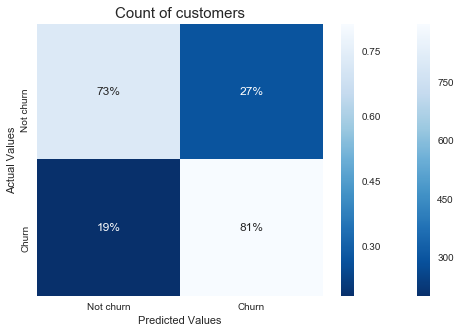

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
#print(cnfm)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix,
            xticklabels = ["Not churn","Churn"],
            yticklabels = ["Not churn","Churn"],
            cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Count of customers', size = 15);

confusion_matrix_normalised = [[773/(773+291), 291/(773+291)],
                               [206/(206+895), 895/(206+895)]]

hm = sns.heatmap(confusion_matrix_normalised,
            xticklabels = ["Not churn","Churn"],
            yticklabels = ["Not churn","Churn"],
            cmap = 'Blues_r', annot=True, fmt="0.00%")
hm.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.title('Count of customers', size = 15);


## Precision, Recall, f1-Score

- The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
    - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
- The recall is intuitively the ability of the classifier to find all the positive samples.
    - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1064
           1       0.75      0.82      0.78      1101

    accuracy                           0.77      2165
   macro avg       0.77      0.77      0.77      2165
weighted avg       0.77      0.77      0.77      2165



## ROC Curve

An ROC curve is a graphical representation of the trade off between the false negative and false positive rates for every possible cut off.

Equivalently, the ROC curve is the representation of the trade offs between sensitivity (Sn) and specificity (Sp).


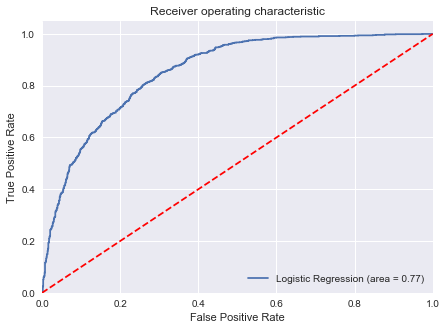

In [49]:

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Sensitivity = True Positive Rate

Specificity = False Positive Rate

## Naïve Bayes

### Naïve Bayes algorithm:
Naïve Bayes algorithm is a classification technique based on Bayes theorem (conditional probability). In simple words the Naïve Bayes algorithm constructs classifiers by calculating the probability of an event (Dependent variable) based on all the other conditions, with an assumption of these conditions being independent.
### Bayes theorem (Conditional probability):
                                P(A|B) = P(B|A) *P(A) / P(B)
In this P(A|B) is called posterior probability (Probability of classification)
P(B|A) is the Likelihood and P(A) is the Prior probability and P(B) is the evidence probability
So, in English Bayes theorem is posterior = prior * likelihood / evidence
### Naïve Bayes theorem:
AK is the dependent event which has the K probable outcomes based on the probability calculated on C1 to Cn conditions.
                                
                                P(AK| C1,C2,C3,……..,Cn ) = P( C1,C2,C3,……..,Cn|AK) *P(AK) / P( C1,C2,C3,……..,Cn)
    
Considering the assumptions that in Naïve Bayes the conditions C1 to Cn are independent, we can use the condition of P (A, B) = P(A)*P(B) where A, B are independent.

Where P(C1,C2,C3,……..,Cn|AK) = P(C1,|A)*P(C2| AK)*P(C3| AK)*…….*P(Cn| AK) and P(C1,C2,C3,……..,Cn) = P(C1)* P(C2) * P(C3)*….*P(Cn)

C1 to Cn are assumed to be independent conditions to reduce the complexity of the probability, which otherwise might need the conditional probability on all the permutations and combinations of the 'n' conditions which is too high as the conditions ‘n’ increase.


In [50]:
X_train, X_test, y_train, y_test = train_test_split(cust_data_X, cust_data_y, test_size=0.3)

In [51]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
y_pred = model.predict(X_test)  
print("The prediction accuracy is: ",model.score(X_test,y_test)*100,"%")

The prediction accuracy is:  75.98152424942263 %


In [53]:
y_pred.shape

(2165,)

In [55]:
print(confusion_matrix(y_test.values, y_pred))
print(classification_report(y_test.values, y_pred))

[[716 373]
 [147 929]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.73      1089
           1       0.71      0.86      0.78      1076

    accuracy                           0.76      2165
   macro avg       0.77      0.76      0.76      2165
weighted avg       0.77      0.76      0.76      2165



[[716 373]
 [147 929]]


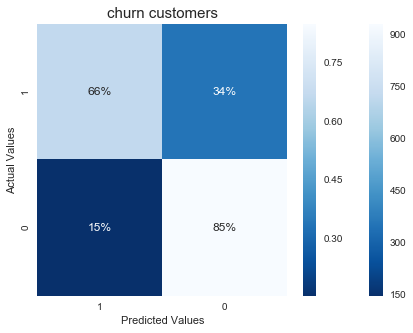

In [56]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix,
            xticklabels = ["1","0"],
            yticklabels = ["1","0"],
            cmap = 'Blues_r')
confusion_matrix_normalised = [[724/(1091), 367/(1091)],
                               [163/(1074), 911/(1074)]]
hm = sns.heatmap(confusion_matrix_normalised,
            xticklabels = ["1","0"],
            yticklabels = ["1","0"],
            cmap = 'Blues_r', annot=True, fmt="0.00%")
hm.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.title('churn customers', size = 15);

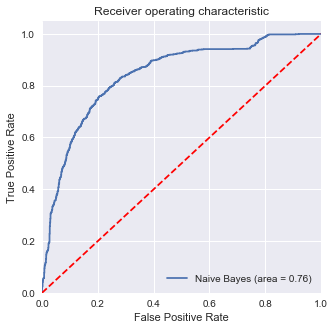

In [57]:

NB_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## KNN 

#### KNN Classification:
##### KNN is a non-parametric, lazy load algorithm that can be used for classification and regression. In general, KNN is more frequently used for classification problems than regression.
* KNN falls into the supervised learning family of algorithms. For solving a problem with the KNN algorithm, we first start with a training data set which consists of an dependent variable and several features of the independent variables which explains a relationship to the dependent variable. KNN algorithm essentially boils down to forming a group of K most similar instances to a given unseen new observation. The similarity between instances is measured as function of Euclidian distances between data points
* For example, if we have a group of 5 white dots and 4 black dots, which are grouped separately with the whites being closer to each other and black dots being closes to each other. Now if we have a new dot that is in between these two groups and if we want to predict the classification for this new dot, we need to calculate the similarity measure in Euclidean distance between this new dot and all the white dots. Similarly, we will also calculate the Euclidean distance with the black dots and see which of the two groups have a closer affinity with the new dot. Based on this distance, we can group the new dot into one of these groups.

##### Pros:
* Simple and easy to explain algorithm
* No assumptions about the data
* Executes quickly for smaller data sets

##### Cons:
* Computationally expensive — because of the algorithm stores all the training data
* High memory requirement
* Stores all (or almost all) of the training data
* Prediction stage might be slow (with big N)
* Sensitive to irrelevant features and the scale of the data


In [58]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [59]:
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [60]:
y_pred = classifier.predict(X_test)  
print("The prediction accuracy is: ",classifier.score(X_test,y_test)*100,"%")

The prediction accuracy is:  77.73672055427252 %


In [62]:
print(confusion_matrix(y_test.values, y_pred))  
print(classification_report(y_test.values, y_pred))  

[[711 378]
 [104 972]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1089
           1       0.72      0.90      0.80      1076

    accuracy                           0.78      2165
   macro avg       0.80      0.78      0.77      2165
weighted avg       0.80      0.78      0.77      2165



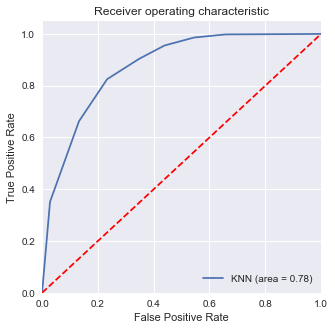

In [63]:
KNN_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Finding the Optimal K

Selecting the right K is very important in KNN algorithm. 
* If the K is very small, we will have a problem of over fitting the results. 
* On the other hand, a very K value defeats the purpose of classification and can be computationally very expensive. 

A simple approach is to choose K by k = n^(1/2).

So, optimizing it and using the least error model is the best way to select the K value. Here we are finding the error (Euclidian distance between the actual and predicted) when we have the neighborhood k values between 1 and 40 then consider the K values which has the least error value is the most optimized way to select K value


In [64]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test.values))

Text(0,0.5,'Mean Error')

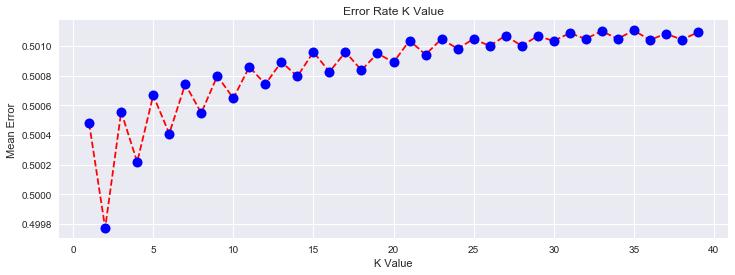

In [65]:
plt.figure(figsize=(12, 4))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

From above plot we take, k=2

In [66]:
classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [67]:
print("The prediction accuracy is: ",classifier.score(X_test,y_test)*100,"%")

The prediction accuracy is:  78.61431870669746 %


In [68]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[895 194]
 [269 807]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1089
           1       0.81      0.75      0.78      1076

    accuracy                           0.79      2165
   macro avg       0.79      0.79      0.79      2165
weighted avg       0.79      0.79      0.79      2165



[[895 194]
 [269 807]]


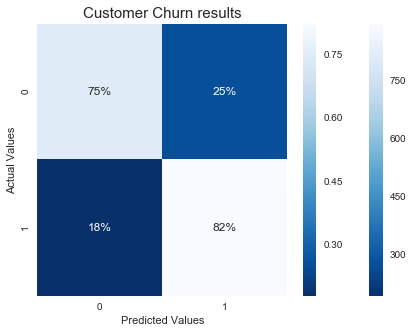

In [69]:

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix,
            xticklabels = ["0","1"],
            yticklabels = ["0","1"],
            cmap = 'Blues_r')
confusion_matrix_normalised = [[ 813/1091, 278/1091],
                               [ 191/1074, 883/1074]]
hm = sns.heatmap(confusion_matrix_normalised,
            xticklabels = ["0","1"],
            yticklabels = ["0","1"],
            cmap = 'Blues_r', annot=True, fmt="0.00%")
hm.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.title('Customer Churn results', size = 15);

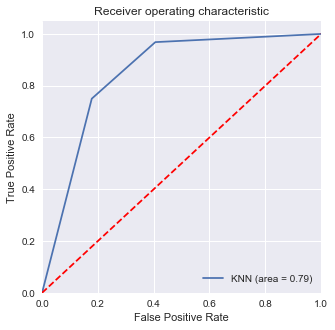

In [70]:

KNN_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random Forest

Random forests, also known as random decision forests, are a popular ensemble method that can be used to build predictive models for both classification and regression problems. Ensemble methods use multiple learning models to gain better predictive results — in the case of a random forest, the model creates an entire forest of random uncorrelated decision trees to arrive at the best possible answer. Decision Tree algorithm belongs to the family of supervised learning algorithms. The decision tree algorithm tries to solve the problem, by using tree representation.

Random forest aims to reduce the previously mentioned correlation issue by choosing only a subsample of the feature space at each split. Essentially, it aims to make the trees de-correlated and prune the trees by setting a stopping criterion for node splits
* **Classification tree** analysis is when the predicted outcome is the class (discrete) to which the data belongs.
* <b>Regression tree</b> analysis is when the predicted outcome can be considered a real number (e.g. the price of a house, or a patient's length of stay in a hospital).

#### Business Uses:

Random Forest can be used for a plethora of data circumstances including, but not limited to:
* Image classification
* Detecting fraudulent cases in banking systems
* Recommendation engines
* Feature selection

Features of Random Forests
* It is unexcelled in accuracy among current algorithms.
* It runs efficiently on large data bases.
* It can handle thousands of input variables without variable deletion.
* It gives estimates of what variables are important in the classification.
* It generates an internal unbiased estimate of the generalization error as the forest building progresses.
* It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
* It has methods for balancing error in class population unbalanced data sets.
* Generated forests can be saved for future use on other data.
* Prototypes are computed that give information about the relation between the variables and the classification.
* It computes proximities between pairs of cases that can be used in clustering, locating outliers, or (by scaling) give interesting views of the data.
* The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.
* It offers an experimental method for detecting variable interactions.

Below are some assumptions that we made while using a random forest algorithm while training the data:
* Before starting the training of the model, we consider the whole training set as the root.
* Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
* Based on attribute values, records are distributed recursively.
* We use statistical methods for ordering attributes as root or the internal node

In [71]:
rfc=RandomForestClassifier(random_state=42)

#### Grid Search for optimum Parameters

In [72]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

In [73]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [74]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [75]:
rfc=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=7, criterion='gini')

In [76]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [77]:
y_pred=rfc.predict(X_test)

In [78]:
print("The prediction accuracy is: ",rfc.score(X_test,y_test)*100,"%")

The prediction accuracy is:  85.17321016166281 %


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[901 188]
 [133 943]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1089
           1       0.83      0.88      0.85      1076

    accuracy                           0.85      2165
   macro avg       0.85      0.85      0.85      2165
weighted avg       0.85      0.85      0.85      2165



[[901 188]
 [133 943]]


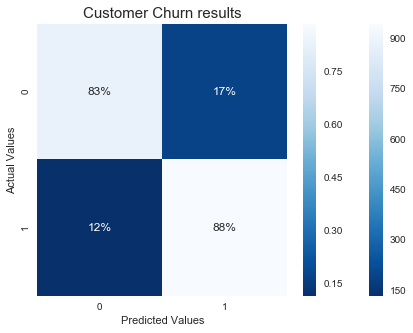

In [81]:

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix,
            xticklabels = ["0","1"],
            yticklabels = ["0","1"],
            cmap = 'Blues_r')
confusion_matrix_normalised = [[ 904/1091, 187/1091],
                               [ 124/1074, 950/1074]]
hm = sns.heatmap(confusion_matrix_normalised,
            xticklabels = ["0","1"],
            yticklabels = ["0","1"],
            cmap = 'Blues_r', annot=True, fmt="0.00%")
hm.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.title('Customer Churn results', size = 15);

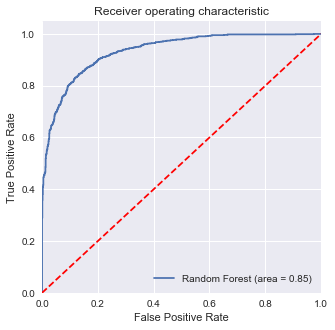

In [82]:

RF_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### DEEP LEARNING

Encoding with label encoder to fit neural network

In [83]:
lb = LabelEncoder() 
column_name=cust_data.columns

In [84]:
for y in column_name:
#     print(y)
    df[y]=lb.fit_transform(df[y] ) 

In [85]:
X = df.loc[:, df.columns != 'Churn']
y = df.loc[:, df.columns == 'Churn']

In [86]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Used SMOTE to balance the data

In [87]:
cust = SMOTE(random_state=0)
columns = X_train.columns
Smote_X,Smote_y=cust.fit_sample(X_train, y_train)
Smote_X = pd.DataFrame(data=Smote_X,columns=columns )
Smote_y= pd.DataFrame(data=Smote_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(Smote_X))
print("Number of churns in oversampled data",len(Smote_y[Smote_y['y']==0]))
print("Number of no churns",len(Smote_y[Smote_y['y']==1]))
print("Proportion of churn data in oversampled data is ",len(Smote_y[Smote_y['y']==0])/len(Smote_X))
print("Proportion of no churn data in oversampled data is ",len(Smote_y[Smote_y['y']==1])/len(Smote_X))

length of oversampled data is  7216
Number of churns in oversampled data 3608
Number of no churns 3608
Proportion of churn data in oversampled data is  0.5
Proportion of no churn data in oversampled data is  0.5


Changed the target variable to binary using *to_categorical*

In [88]:
X_train=Smote_X
y_train=Smote_y

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Applying Deep Learning Model with 3 Dense Layers

In [89]:

model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=19))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 632
Trainable params: 632
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

In [92]:
model_loss, model_accuracy = model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}") 
print(f"Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.4643237100958259
Accuracy: 0.7810426541414306


## CONCLUSIONS

| Model | Accuracy | Precision Score | Recall | F1 | CrossVal Train score | CrossVal Standard Deviation | ROC | 
|---------|------------|----------|---------|------|------|
|Logistic Regression |77.3% |77%  | 77% | 77% | 80.62% | 1 | 0.77 | 
|Optimized Random Forest |86.6% | 85% | 85% | 85% | 79.42% | 1.15 | 0.85 | 
| Naive Bayes | 75.3%| 77% |76% |76%|75.32% |1.71|0.76| 
|Optimized KNN |78.9% | 79% | 79% |79% | 77.47% |1.65 |0.79| 

#### Deep Learning

| Model | Activation |Number of Dense Layers | Accuracy | Loss |
|----- |------|----- |------ |----- |
| Sequential | Relu & Softmax | 3 |78% |0.46 |

* All the values for the model are approximately same since, we have a balanced data set for train and testing as we have used SMOTE analysis
*	The best model for this data set to predict the churn customers based on their behavior is Random Forest as it is having the maximum accuracy, higher F1 score and ROC (area under the curve)

* The main business problem here is to identify the about to churn customers. So, the typeI error should be lower(Precision id high) - Random forest giving the better solution with precision too along with other performance metrics

** From above we can infer that Random Forests perform best with an accuracy of around 85% and ROC 0.85. The parameters used are**
- **max_features : auto**
- **n_estimators :  500**
- **max_depth : 7**
- **criterion: gini**

*These values can vary from 0.1 to 0.5% when we rerun the code as every time different samples get selected for test and train data set*

## Future Steps:

* Using the predictive model we can identify the customers and plan the marketing campaigns and promotional events.
* Once we identify the churn customers, we need to do a customer segmentation on what factors effecting the customers most.
* Examples of campaigning events
    * Churn due to higher monthly charges – discounts can be offered.
    * Churn due to contract type – special contract campaign can be offered to these customers.(3month, 6months contracts can be included to build trust with customers)
* Marketing campaigns are the high cost to the company. So, we need to test before offering it to the whole set of customers using hypothesis testing
    * Conduct and A/B testing for the offers and promotional events, to see if there is any significant decrease in churn customers and then calculate the net profit of customer retaining and cost of the campaign before proceeding. 


## Referrences:

    1.https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
    2.https://www.kaggle.com/bandiatindra/telecom-churn-prediction
    3.http://www.pmean.com/99/roc.html
	4.https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
	5.https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
	6.https://www.kaggle.com/stardust0/naive-bayes-and-logistic-regression-baseline
	7.https://www.kaggle.com/mjamilmoughal/k-nearest-neighbor-classifier-to-predict-fruits
	8.https://www.kaggle.com/raviolli77/random-forest-in-python
